In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('house_prices.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])


In [16]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [18]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

<Axes: xlabel='GarageQual'>

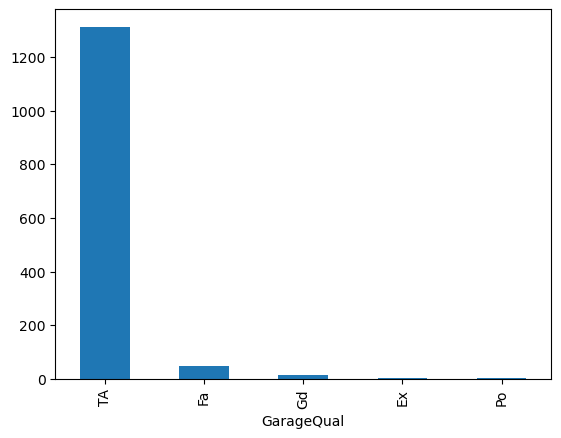

In [20]:
df['GarageQual'].value_counts().plot(kind='bar')

In [24]:
df['GarageQual'].mode() # ei column er mode value holo TA

0    TA
Name: GarageQual, dtype: object

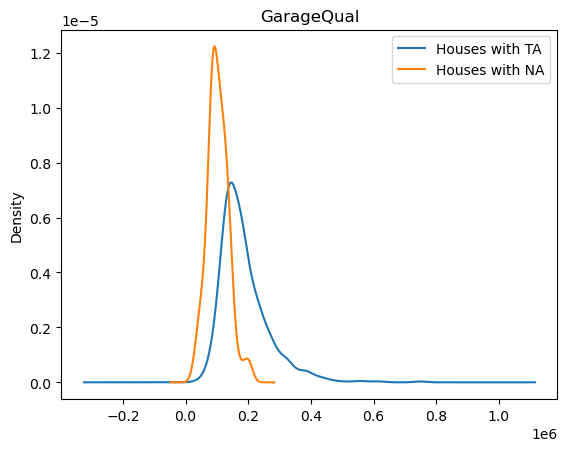

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual']== 'TA']['SalePrice'].plot(kind='kde',ax=ax)
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind= 'kde',ax=ax)

ax.legend(['Houses with TA', 'Houses with NA'], loc= 'best')
plt.title('GarageQual')

plt.show()

In [54]:
temp = df[df['GarageQual']=='TA']['SalePrice']

In [60]:
df['GarageQual'].fillna('TA', inplace=True) # Missing values gula TA diye fill kore dilam.

<Axes: xlabel='GarageQual'>

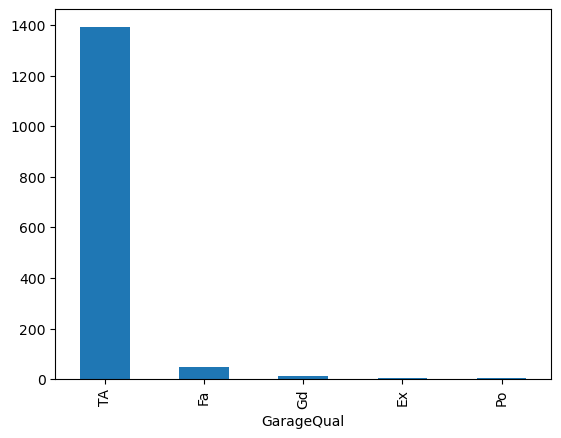

In [62]:
df['GarageQual'].value_counts().plot(kind='bar')

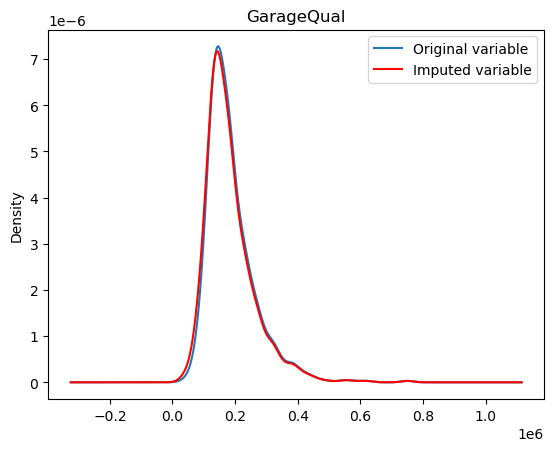

In [76]:
# ekhon amra dekhbo missing value fill korar por bar plot kmn ashe.

fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind = 'kde', ax=ax)
# distribution of the variable after imputation
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='r')


ax.legend(['Original variable', 'Imputed variable'])
plt.title('GarageQual')

plt.show()

## For FireplaceQu

<Axes: xlabel='FireplaceQu'>

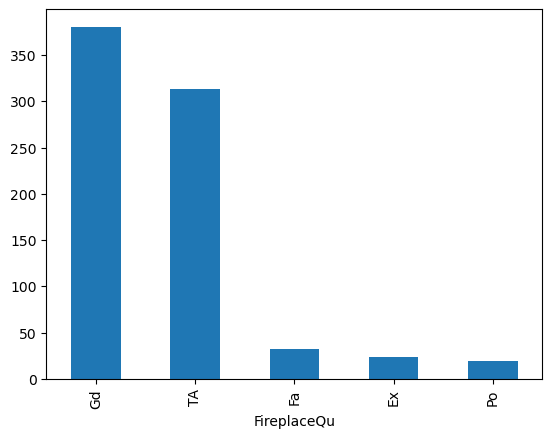

In [79]:
df['FireplaceQu'].value_counts().plot(kind='bar')

- ```ekhane amra dekhtechi Gd and TA duitai onek boro , almost same. Tai ekhane amra imputation kore valo result pabo na. Just ekta boro hole valo result pawa jeto. GarageQual er moto.```

In [83]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

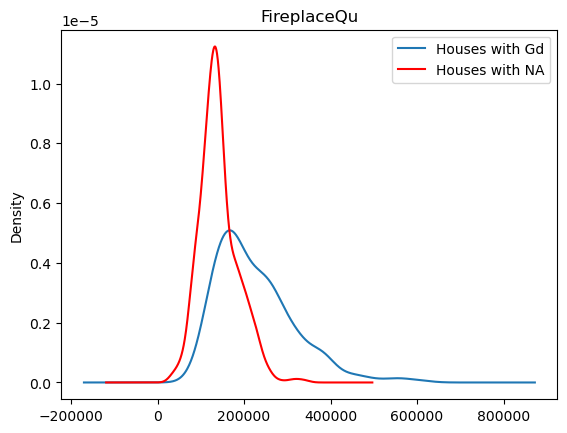

In [89]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

ax.legend(['Houses with Gd', 'Houses with NA'])
plt.title('FireplaceQu')


plt.show()

In [91]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']

In [95]:
df['FireplaceQu'].fillna('Gd', inplace=True)

<Axes: xlabel='FireplaceQu'>

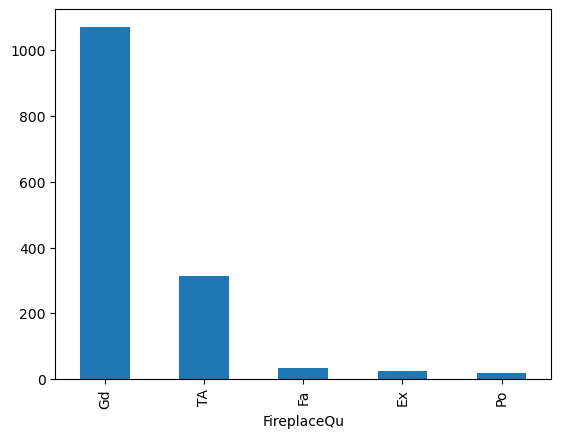

In [97]:
df['FireplaceQu'].value_counts().plot(kind='bar')

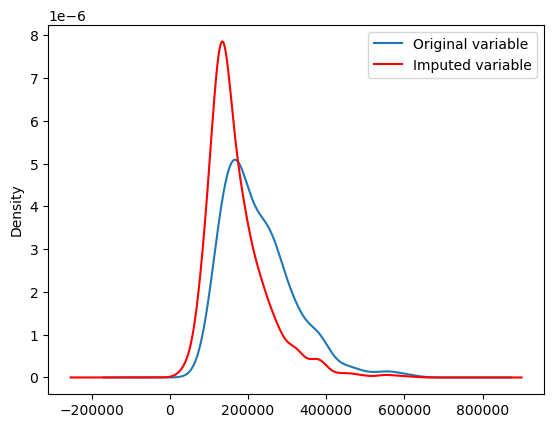

In [101]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')


ax.legend(['Original variable', 'Imputed variable'])

- ```ekhane clearly dekha jacche original variable and imputed variable e onek difference ache```

In [104]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [106]:
from sklearn.impute import SimpleImputer

In [108]:
imputer = SimpleImputer(strategy='most_frequent')

In [112]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [114]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)